# 최적화 기초

In [1]:
import numpy as np
import matplotlib.pyplot as plt

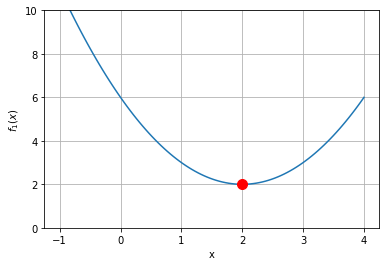

In [4]:
def f1(x):
    return (x-2)**2 + 2

xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize = 10)
plt.grid()
plt.ylim(0, 10)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.show()

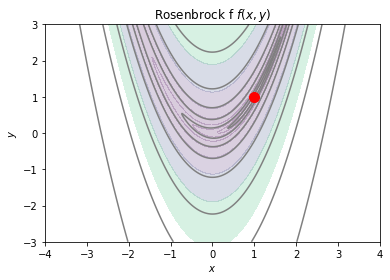

In [5]:
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels=np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=10)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Rosenbrock f $f(x,y)$")
plt.show()

trial 1: x_1 = 0.00, g_1 = -4.00
trial 2: x_2 = 1.60, g_2 = -0.80
trial 3: x_3 = 1.92, g_3 = -0.16


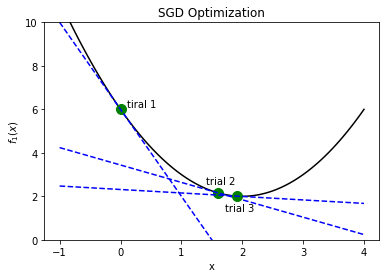

In [8]:
def f1d(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2.0)

xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')

# step size
mu = 0.4

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "tiral 1")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("trial 1: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) + 0.4, "trial 2")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("trial 2: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) - 0.7, "trial 3")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("trial 3: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("SGD Optimization")
plt.ylim(0, 10)
plt.show()

trial 1: x_1 = 0.00, g_1 = -4.00
trial 2: x_2 = 4.40, g_2 = 4.80
trial 3: x_3 = -0.88, g_3 = -5.76


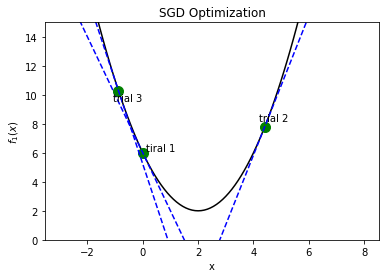

In [11]:

xx = np.linspace(-3, 8, 100)

plt.plot(xx, f1(xx), 'k-')

# step size
mu = 1.1

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "tiral 1")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("trial 1: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) + 0.4, "trial 2")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("trial 2: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) - 0.7, "trial 3")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("trial 3: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("SGD Optimization")
plt.ylim(0, 15)
plt.show()

In [12]:
def f2g(x, y):
    """f2(x, y)의 도함수"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

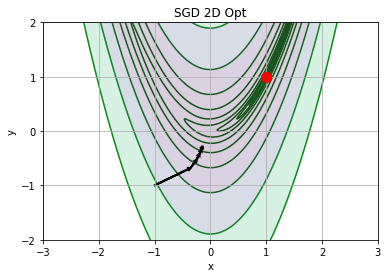

In [14]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 8e-4  # step size
s = 0.95  # for arrowhead drawing

x, y = -1, -1
for i in range(5):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.xticks(np.linspace(-3, 3, 7))
plt.yticks(np.linspace(-2, 2, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("SGD 2D Opt")
plt.grid()
plt.show()

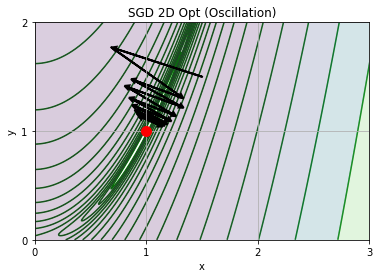

In [16]:
xx = np.linspace(0, 4, 800)
yy = np.linspace(0, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 4, 20)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 1.8e-3  # 스텝 사이즈
s = 0.95  # 화살표 크기

x, y = 1.5, 1.5
for i in range(15):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(0, 3)
plt.ylim(0, 2)
plt.xticks(np.linspace(0, 3, 4))
plt.yticks(np.linspace(0, 2, 3))
plt.xlabel("x")
plt.ylabel("y")
plt.title("SGD 2D Opt (Oscillation)")
plt.grid()
plt.show()

* SciPy를 이용한 최적화

result = minimize(func, x0, jac=jac)

In [19]:
from scipy.optimize import minimize

def f1(x):
    return (x - 2) ** 2 + 2

x0 = 0  # 초깃값
result = minimize(f1, x0)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])


In [23]:
def f1p(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2)

result = minimize(f1, x0)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])


In [24]:
def f1p(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2)

result = minimize(f1, x0, jac=f1p)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.])


In [25]:
# 다변수 함수를 최적화하는 경우에는 목적함수가 벡터 인수를 가져야 한다.
# 2차원 목적함수 재정의(벡터 입력을 받도록)
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

x0 = (-2, -2)
result = minimize(f2, x0)
print(result)

      fun: 2.0512005854761512e-11
 hess_inv: array([[0.49880143, 0.9976255 ],
       [0.9976255 , 2.00026812]])
      jac: array([ 9.06025525e-07, -5.03171238e-07])
  message: 'Optimization terminated successfully.'
     nfev: 216
      nit: 56
     njev: 72
   status: 0
  success: True
        x: array([0.99999547, 0.99999093])


In [26]:
# 5.1.1

def f511(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

x0 = (2, 0.3)
result = minimize(f511, x0)
print(result)

      fun: 2.089434154331796e-11
 hess_inv: array([[0.49022117, 0.98027058],
       [0.98027058, 1.96519149]])
      jac: array([ 1.58933958e-06, -8.86397022e-07])
  message: 'Optimization terminated successfully.'
     nfev: 75
      nit: 18
     njev: 25
   status: 0
  success: True
        x: array([0.99999543, 0.99999085])


In [33]:
def f511g(x):
    return np.array((2.0 * (x[0] -1) - 400.0 * x[0] * (x[1] - x[0]**2), 200.0 * (x[1]- x[0]**2)))


result = minimize(f511, x0, jac = f511g)
print(result)

      fun: 1.0392866876869952e-14
 hess_inv: array([[0.49022342, 0.98027934],
       [0.98027934, 1.96521752]])
      jac: array([ 1.58870156e-06, -8.86163987e-07])
  message: 'Optimization terminated successfully.'
     nfev: 25
      nit: 18
     njev: 25
   status: 0
  success: True
        x: array([0.99999991, 0.99999981])


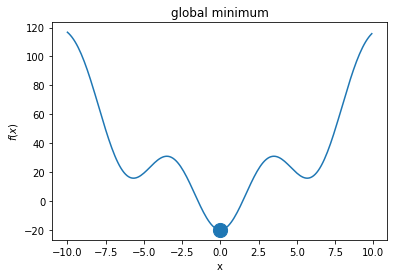

In [34]:
def f_global(x):
    """비선형 목적함수"""
    return x**2 - 20 * np.cos(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f_global(x))
plt.scatter(0, f_global(0), s=200)
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.title("global minimum")
plt.show()

In [38]:
result = minimize(f_global, 4)
print(result)
x_sol = result['x']
x_sol

      fun: 15.791736781359312
 hess_inv: array([[0.05417267]])
      jac: array([-2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([5.67920777])


array([5.67920777])

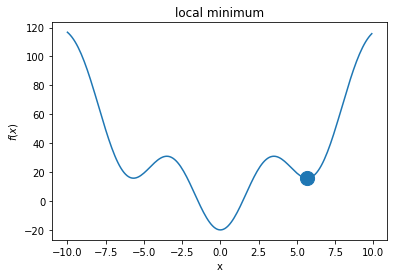

In [39]:
plt.plot(x, f_global(x));
plt.scatter(x_sol, f_global(x_sol), s=200)
plt.title("local minimum")
plt.ylabel("$f(x)$")
plt.xlabel("x")
plt.show()

In [41]:
def f2prime(x):
    return np.array([2 * (x[0] - 1) + 400 * x[0] * (x[0]**2 - x[1]),
                     200 * x[1] * (x[1] - x[0]**2)])

result = minimize(f2, (2, 0.3), jac=None)
print(result)

      fun: 2.089434154331796e-11
 hess_inv: array([[0.49022117, 0.98027058],
       [0.98027058, 1.96519149]])
      jac: array([ 1.58933958e-06, -8.86397022e-07])
  message: 'Optimization terminated successfully.'
     nfev: 75
      nit: 18
     njev: 25
   status: 0
  success: True
        x: array([0.99999543, 0.99999085])
